In [1]:
from rtcoopt import get_load_as, get_quickstarts, get_system_conditions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import calendar

In [4]:
from pathlib import Path

### Loading Permdata

In [5]:
DATA = Path.cwd()/'2017publicdata'

In [6]:
permdata = get_system_conditions(DATA)

In [7]:
permdata = get_quickstarts(DATA, permdata)

In [8]:
daylist = pd.read_csv(DATA/'daylist.csv')

In [9]:
day_array = np.append(daylist.columns.values, daylist.values.reshape((-1,)))

In [ ]:
for day in day_array:
    permdata = get_load_as(DATA/str(day),permdata)
    print(day)

20170101
20170102
20170103
20170104
20170105
20170106
20170107
20170108
20170109
20170110
20170111
20170112
20170113
20170114
20170115
20170116
20170117
20170118
20170119
20170120
20170121
20170122
20170123
20170124
20170125
20170126
20170127
20170128
20170129
20170130
20170131
20170201
20170202
20170203
20170204
20170205
20170206
20170207
20170208
20170209
20170210
20170211
20170212
20170213
20170214
20170215
20170216
20170217
20170218
20170219
20170220
20170221
20170222
20170223
20170224
20170225
20170226
20170227
20170228
20170301
20170302
20170303
20170304
20170305
20170306
20170307
20170308
20170309
20170310
20170311
20170312
20170313
20170314
20170315
20170316
20170317
20170318
20170319
20170320
20170321
20170322
20170323
20170324
20170325
20170326
20170327
20170328
20170329
20170330
20170331
20170401
20170402
20170403
20170404
20170405
20170406
20170407
20170408
20170409
20170410
20170411
20170412
20170413
20170414
20170415
20170416
20170417
20170418
20170419
20170420
20170421
2

In [14]:
syscond = {}
for k,v in permdata['SystemConditions'].items():
    syscond[k[0]]=v

In [15]:
df_raw = pd.DataFrame(syscond).T

In [16]:
df = df_raw.reindex(pd.to_datetime(df_raw.index))

In [17]:
df = df.resample('15min').mean()

In [18]:
df.describe()

,GTBD,LoadNSRS,LoadRRS,LoadRegUp,NSRSMW,NSRSPrice,OutNSRS,OutRRS,OutRegUp,RRSMW,RRSPrice,RegDownMW,RegDownPrice,RegUpMW,RegUpPrice,SystemLambda
count,35036.000000,3.503600e+04,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000,35036.000000
mean,40982.516624,9.346280e+01,2381.865112,0.417131,962.725579,2.817366,6.753054,7.546301,0.417131,1313.819731,9.833608,265.880059,6.261498,274.729204,7.851790,26.676436
std,9133.391295,1.125943e+04,525.102075,2.365769,163.598132,4.481249,9.501680,10.031814,2.365769,92.464016,8.810038,93.274966,7.614480,98.804658,12.815779,51.447170
min,25281.800000,0.000000e+00,1207.800000,0.000000,17.700000,0.010000,0.000000,0.000000,0.000000,966.200000,0.950000,84.900000,0.010000,38.000000,0.440000,-19.990000
25%,34644.675000,0.000000e+00,2300.800000,0.000000,841.875000,0.970000,0.000000,0.000000,0.000000,1242.500000,4.420000,195.200000,2.150000,208.000000,3.110000,18.650000
50%,38914.550000,0.000000e+00,2542.000000,0.000000,967.000000,1.320000,0.000000,1.600000,0.000000,1348.000000,7.660000,243.100000,3.500000,250.000000,5.060000,20.740000
75%,45756.675000,2.000000e+01,2723.600000,0.000000,1066.925000,3.410000,20.000000,20.000000,0.000000,1354.200000,12.000000,314.550000,7.910000,323.000000,8.850000,25.370000
max,69007.100000,2.000020e+06,22763.600000,21.900000,1880.900000,155.000000,30.000000,152.200000,21.900000,1854.700000,229.310000,604.000000,80.830000,759.000000,900.000000,2429.630000


In [19]:
twelve24 = df.groupby([df.index.month,df.index.hour]).median()

In [20]:
twelve24.xs(1,level=0).tail()

,GTBD,LoadNSRS,LoadRRS,LoadRegUp,NSRSMW,NSRSPrice,OutNSRS,OutRRS,OutRegUp,RRSMW,RRSPrice,RegDownMW,RegDownPrice,RegUpMW,RegUpPrice,SystemLambda
19,38821.85,20.0,2722.1,0.0,1028.50,0.50,20.0,20.0,0.0,1351.0,13.62,262.50,3.01,220.0,4.00,22.725
20,38138.25,20.0,2722.2,0.0,1026.10,0.50,20.0,20.0,0.0,1351.0,11.01,271.50,3.37,225.0,3.28,22.270
21,36935.60,20.0,2719.0,0.0,1029.80,0.50,20.0,20.0,0.0,1351.0,11.01,319.30,4.80,244.0,4.00,21.195
22,34510.70,20.0,2716.8,0.0,816.65,0.01,20.0,20.0,0.0,1348.0,15.00,370.10,10.00,288.0,5.00,20.280
23,32194.60,20.0,2716.6,0.0,816.50,0.01,20.0,20.0,0.0,1348.0,15.04,328.15,8.00,226.0,3.00,19.865


# Plot the PermData

In [21]:
markets = {
    'energy':{
        'production':('GTBD','Generation to be Dispatched (MW)'),
        'price':('SystemLambda','System Lambda ($/MWh)')
    },
    'LoadNSRS':{
        'production':('LoadNSRS','AS Obl for NonSpin (MW)'),
        'price':('NSRSPrice','NonSpin Price ($/MWh)')
    },
    'LoadRRS':{
        'production':('LoadRRS','AS Obl for RRS (MW)'),
        'price':('RRSPrice','RRS Price ($/MWh)')
    },
    'LoadRegUp':{
        'production':('LoadRegUp','AS Obl for RegUp (MW)'),
        'price':('RegUpPrice','RegUp Price ($/MWh)')
    },
    'NSRS':{
        'production':('NSRSMW','NSRS Dispatched (MW)'),
        'price':('NSRSPrice','NSRS Price ($/MWh)')
    },
    'OutNSRS':{
        'production':('OutNSRS','NSRS Dispatched (MW)'),
        'price':('NSRSPrice','NSRS Price ($/MWh)')
    },
    'OutRRS':{
        'production':('OutRRS','RRS Dispatched (MW)'),
        'price':('RRSPrice','RRS Price ($/MWh)')
    },
    'RRS':{
        'production':('RRSMW','RRS Dispatched (MW)'),
        'price':('RRSPrice','RRS Price ($/MWh)')
    },
    'RegDown':{
        'production':('RegDownMW','Regulation Down(MW)'),
        'price':('RegDownPrice','RegDown Price ($/MWh)')
    },
    'RegUp':{
        'production':('RegUpMW','Regulation Up(MW)'),
        'price':('RegUpPrice','RegUp Price ($/MWh)')
    }
}

In [22]:
def twelve24plot(market):
    plt.rcParams["figure.figsize"] = (28,28)
    fig, ax = plt.subplots(4,3,sharex=True,sharey=True)
    count=1
    market_dict = markets[market]
    production = market_dict['production']
    price = market_dict['price']

    for row in range(4):
        for column in range(3):
            month_df = twelve24.xs(count,level=0)
            ax2 = ax[row,column].twinx()

            ax[row,column].plot(month_df[production[0]],label=production[1],color='b',linestyle='--')
            ax2.plot(month_df[price[0]],label=price[1],color='g',linestyle='-',drawstyle='steps')
            ax2.plot(np.nan,'b--',label=production[1])

            ax2.yaxis.set_ticks(np.arange(0,41,5))
            ax[row,column].xaxis.set_ticks(np.arange(0,24, 4))
            ax[row,column].set_ylabel('Production (MWh)')
            ax2.set_ylabel('Price ($/MWh)')
            ax2.legend(loc='best')
            ax[row,column].set_title(calendar.month_name[count])
            count+=1

In [23]:
markets.keys()

dict_keys(['energy', 'LoadNSRS', 'LoadRRS', 'LoadRegUp', 'NSRS', 'OutNSRS', 'OutRRS', 'RRS', 'RegDown', 'RegUp'])

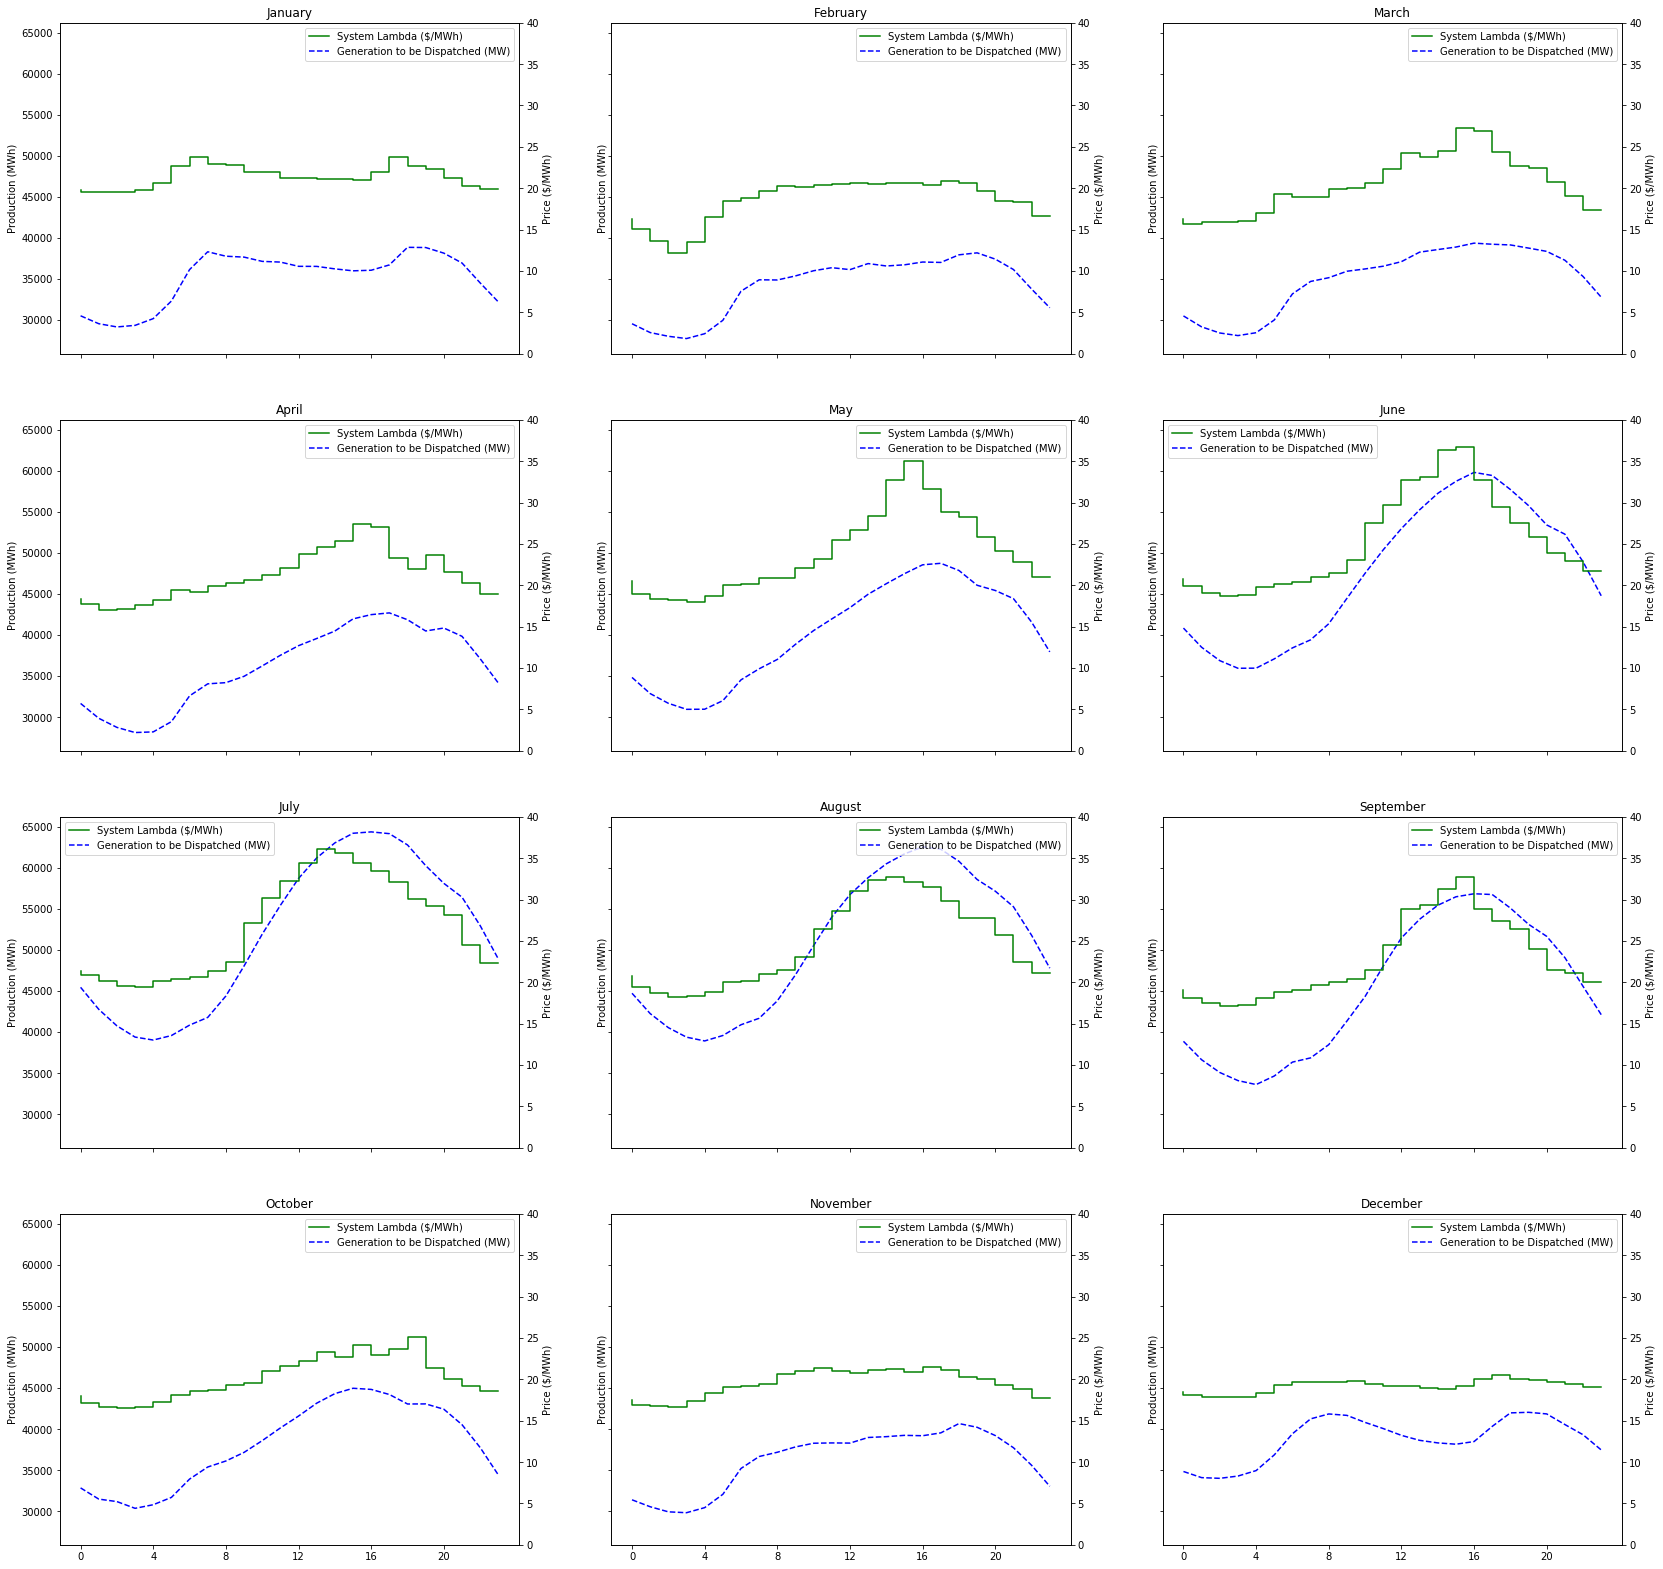

In [24]:
twelve24plot('energy')